<a href="https://colab.research.google.com/github/asaklani02/Machine-Learning-Assignment/blob/main/Cnn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [65]:
#Define training and test paths
from google.colab import drive
drive.mount('/content/gdrive')
train_path= "/content/gdrive/MyDrive/Colab Notebooks/train_val"
test_path = "/content/gdrive/MyDrive/Colab Notebooks/test"

from google.colab import files
data_to_load = files.upload()
import io
train_title = pd.read_csv(io.BytesIO(data_to_load['train_v.csv']))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Saving train_v.csv to train_v (2).csv


In [66]:
image_train = []
titles = []
for image_file in os.listdir(train_path):
    if image_file.endswith('.png'):
        
        #Resizing the image
        image = cv2.imread(os.path.join(train_path, image_file))
        image = cv2.resize(image, (128, 128))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        img_arr = np.array(image)

        image_train.append(img_arr)
        titles.append(image_file)

#String to numerical 
le = LabelEncoder()
titles = le.fit_transform(titles)

# Creating NumPy arrays for the training images and titles lists
image_train = np.array(image_train)
titles = np.array(titles)

# Saving the arrays in the Numpy Format
np.save('x_train.npy', image_train)
np.save('y_train.npy', titles)

x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

In [67]:
x_train.shape,  y_train.shape

((1000, 128, 128, 3), (1000,))

In [68]:
x_train[:5]
y_train[:5]

array([ 8,  7,  9,  1, 10])

In [69]:
image_val = []
titles = []
for image_file in os.listdir(test_path):
    if image_file.endswith('.png'):
        # Resizing the image
        image = cv2.imread(os.path.join(test_path, image_file))
        image = cv2.resize(image, (128, 128))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        img_arr = np.array(image)

        image_val.append(img_arr)
        titles.append(image_file)

#String to numerical 
le = LabelEncoder()
titles = le.fit_transform(titles)

# Creating NumPy arrays for the training images and titles lists
image_val = np.array(image_val)
titles = np.array(titles)

# Saving the arrays in the Numpy Format
np.save('x_test.npy', image_val)
np.save('y_test.npy', titles)

x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [70]:
x_test.shape

(50, 128, 128, 3)

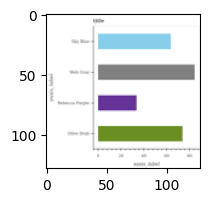

In [71]:
#Loaded images
plt.figure(figsize = (5,2))
plt.imshow(x_train[200])

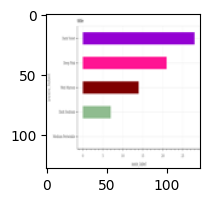

In [72]:
plt.figure(figsize = (5,2))
plt.imshow(x_train[350])

In [73]:
# Define image classes
img_class = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
img_class[0]

# Map the titles
title_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([title_map[label] for label in train_title['type']])

y_train.shape, y_test.shape


((1000,), (50,))

In [74]:
def img_sample(x, y, index):
    plt.figure(figsize = (10,2))
    plt.imshow(x[index])
    plt.xlabel(img_class[y[index]])

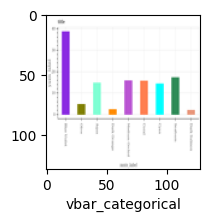

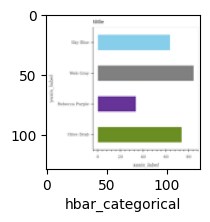

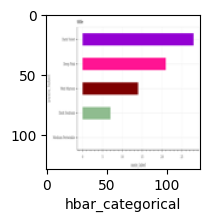

In [75]:
img_sample(x_train,y_train,0)
img_sample(x_train,y_train,200)
img_sample(x_train,y_train,350)

In [76]:
#Image Normalization
x_train=x_train /255
x_test=x_train /255

In [77]:
x_test.shape

(1000, 128, 128, 3)

In [78]:
y_train_index = train_title['image_index']
y_train_type = train_title['type']

In [79]:
y_train_type[:5]

0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [80]:
#Creating Neural Network
nn = Sequential([
    Flatten(input_shape=(128,128,3)),Dense(3000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(5, activation='softmax')
])
# Neural Network compilation
nn.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn.fit(x_train,y_train,epochs=10)

Epoch 1/10
32/32 [==============================] - 41s 1s/step - loss: 6.6065 - accuracy: 0.2220
Epoch 2/10
32/32 [==============================] - 32s 1s/step - loss: 1.6427 - accuracy: 0.1930
Epoch 3/10
32/32 [==============================] - 34s 1s/step - loss: 1.6002 - accuracy: 0.2480
Epoch 4/10
32/32 [==============================] - 32s 1s/step - loss: 1.5827 - accuracy: 0.2820
Epoch 5/10
32/32 [==============================] - 32s 1s/step - loss: 1.5547 - accuracy: 0.2960
Epoch 6/10
32/32 [==============================] - 32s 1s/step - loss: 1.5543 - accuracy: 0.2920
Epoch 7/10
32/32 [==============================] - 34s 1s/step - loss: 1.5724 - accuracy: 0.2710
Epoch 8/10
32/32 [==============================] - 33s 1s/step - loss: 1.5559 - accuracy: 0.2800
Epoch 9/10
32/32 [==============================] - 32s 1s/step - loss: 1.5846 - accuracy: 0.2420
Epoch 10/10
32/32 [==============================] - 32s 1s/step - loss: 1.5910 - accuracy: 0.2470


In [81]:
# Train Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [82]:
nn.evaluate(x_test,y_test)

7/7 [==============================] - 2s 265ms/step - loss: 1.6089 - accuracy: 0.2200


[1.6089386940002441, 0.2199999988079071]

In [83]:
y_pred = nn.predict(x_test)
y_pred
y_pred_classes = [np.argmax(ele) for ele in y_pred]


7/7 [==============================] - 2s 257ms/step


In [84]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(800, 128, 128, 3)
(800,)
(200, 128, 128, 3)
(200,)


Epoch 1/50
1/1 [==============================] - 20s 20s/step - loss: 1.6069 - accuracy: 0.2237 - val_loss: 2.2290 - val_accuracy: 0.1750
Epoch 2/50
1/1 [==============================] - 16s 16s/step - loss: 2.1194 - accuracy: 0.2412 - val_loss: 1.5900 - val_accuracy: 0.3200
Epoch 3/50
1/1 [==============================] - 15s 15s/step - loss: 1.6212 - accuracy: 0.3212 - val_loss: 1.6313 - val_accuracy: 0.1850
Epoch 4/50
1/1 [==============================] - 15s 15s/step - loss: 1.6576 - accuracy: 0.2037 - val_loss: 1.5627 - val_accuracy: 0.3150
Epoch 5/50
1/1 [==============================] - 16s 16s/step - loss: 1.5859 - accuracy: 0.2925 - val_loss: 1.5281 - val_accuracy: 0.2700
Epoch 6/50
1/1 [==============================] - 15s 15s/step - loss: 1.5318 - accuracy: 0.2412 - val_loss: 1.5087 - val_accuracy: 0.3350
Epoch 7/50
1/1 [==============================] - 16s 16s/step - loss: 1.4931 - accuracy: 0.3675 - val_loss: 1.4783 - val_accuracy: 0.3450
Epoch 8/50
1/1 [===========

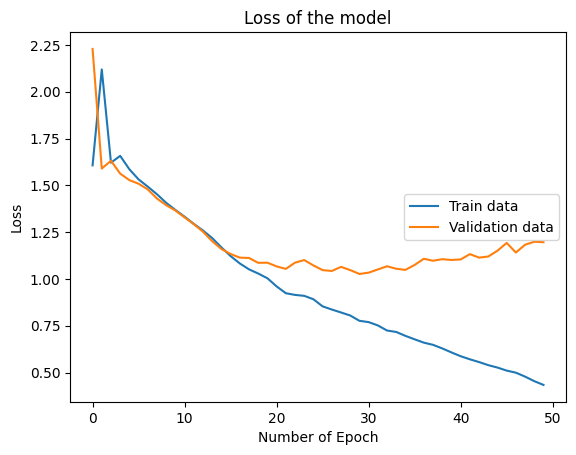

In [85]:
#Creating CNN
cnn = Sequential([
    Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

# CNN Compilation
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Train CNN
history = cnn.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))

# Plotting the loss of model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of the model')
plt.ylabel('Loss')
plt.xlabel('Number of Epoch')
plt.legend(['Train data', 'Validation data'], loc='center right')
plt.show()

In [86]:
cnn.evaluate(x_test,y_test)

7/7 [==============================] - 1s 123ms/step - loss: 1.1963 - accuracy: 0.6200


[1.1962652206420898, 0.6200000047683716]

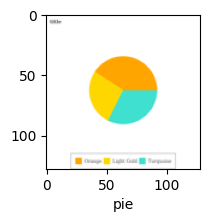

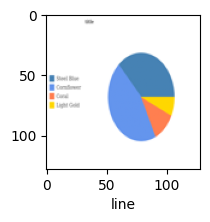

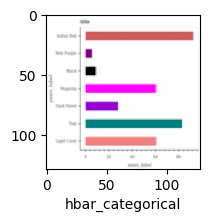

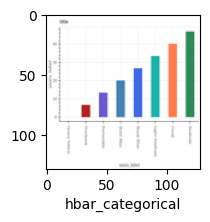

In [87]:
img_sample(x_test,y_test,1)
img_sample(x_test,y_test,50)
img_sample(x_test,y_test,25)
img_sample(x_test,y_test,30)

In [88]:
y_pred = cnn.predict(x_test)
y_pred[:5]

7/7 [==============================] - 1s 121ms/step


array([[6.1155242e-01, 1.1615179e-01, 2.4322493e-01, 4.1589467e-03,
        2.4911886e-02],
       [2.7928017e-02, 6.1082414e-05, 2.1461023e-03, 4.3690222e-04,
        9.6942788e-01],
       [2.7640516e-01, 8.1100110e-03, 2.4302790e-02, 3.9243367e-02,
        6.5193868e-01],
       [3.7930675e-02, 1.2842879e-04, 2.0048681e-01, 9.5061649e-04,
        7.6050341e-01],
       [1.8722050e-01, 4.5083582e-01, 2.6633710e-01, 2.2636551e-02,
        7.2970062e-02]], dtype=float32)

In [89]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 4, 4, 4, 1]

In [90]:
y_test[:5]

array([0, 4, 4, 4, 0])

'dot_line'

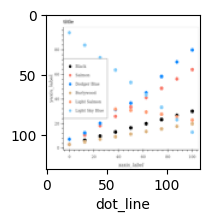

In [91]:
img_sample(x_test,y_test,15) #actual
img_class[y_classes[15]] #predicted

In [92]:
print(classification_report(y_test,y_classes))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57        37
           1       0.83      0.86      0.84        44
           2       0.65      0.42      0.51        48
           3       0.38      0.52      0.44        33
           4       0.68      0.74      0.71        38

    accuracy                           0.62       200
   macro avg       0.62      0.62      0.61       200
weighted avg       0.63      0.62      0.62       200



In [93]:
confusion_mat = confusion_matrix(y_test, y_classes)
print('Confusion Matrix:')
print(confusion_mat)

Confusion Matrix:
[[21  4  0  1 11]
 [ 1 38  0  4  1]
 [10  2 20 16  0]
 [ 2  2 11 17  1]
 [ 3  0  0  7 28]]


Text(95.72222222222221, 0.5, 'Actual values')

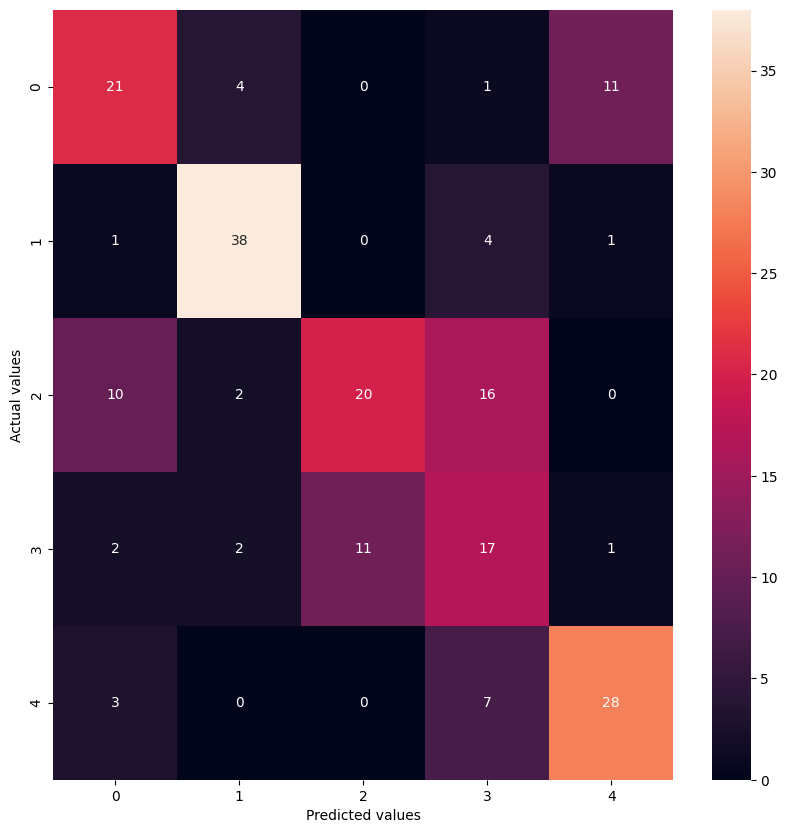

In [94]:
#Confusion matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(confusion_mat,annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

### Finetune the Model

In [95]:
from keras.applications import VGG16
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [96]:
#Input size of image
image_width, image_height = 224, 224

In [97]:
from google.colab import drive
drive.mount('/content/gdrive')
train_path = "/content/gdrive/MyDrive/Colab Notebooks/train_val/"

val_path = "/content/gdrive/MyDrive/Colab Notebooks/train_val/"


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [100]:
# VGG16 Model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_width, image_height, 3))

In [99]:
# Layer freeze of pre-trained model
for layer in vgg_model.layers:
    layer.trainable = False

In [101]:
# Adding layers
x = vgg_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

In [102]:
# A new model with base as pre-trained model and with addition of layers
new_model = Model(inputs=vgg_model.input, outputs=predictions)

In [ ]:
# Model compilation with binary cross entropy
new_model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-5), metrics=['accuracy'])

In [104]:
# Data Augumentation
train_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_gen = ImageDataGenerator(rescale=1./255)

In [105]:
batch_size = 16

nb_train_samples = 1500
nb_val_samples = 300

epochs = 12

In [ ]:
# Model training with data generators
history = new_model.fit(
    train_gen.flow_from_directory(train_path, target_size=(image_width, image_height), batch_size=batch_size, class_mode='binary'),
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_gen.flow_from_directory(val_path, target_size=(image_width, image_height), batch_size=batch_size, class_mode='binary'),
    validation_steps=nb_val_samples // batch_size)

In [107]:
# Model evaluation
test_gen = ImageDataGenerator(rescale=1./255)
from google.colab import drive
drive.mount('/content/gdrive')
test_path = "/content/gdrive/MyDrive/Colab Notebooks/test"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
test_generator = test_gen.flow_from_directory(
    test_path,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='binary')

In [ ]:
test_loss, test_accuracy = new_model.evaluate(test_generator, steps=len(test_generator))


In [ ]:
print('Test accuracy is:', test_accuracy)
print('Test loss is:', test_loss)